# Homework no.2
**Student name:** Mohammad Amin Dadgar <br>
**Student Id:** 4003624016

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import roc_curve

# Q1
Using the training set below answer these question.
\begin{equation}
\text{Training Set }= \{(0.5, 2), (0.7, 3),(1, 8), (1.5, 10), (2, 10.3), (2.7, 5.5), (3, 8), (3.3, 11), (4, 10.2), (4.3, 12)\}
\end{equation}
Each data is $(x_i, y_i)$

## P1
fit the model $y=ax^2+bx+c$ on the given dataset and name the model as model_1. This means
\begin{equation}
\phi_1(x) = 
\begin{bmatrix}
1 \\
x \\
x^2 \\
\end{bmatrix}
\end{equation}
And the weights matrix is
\begin{equation}
W_1 = 
\begin{bmatrix}
c \\
b \\
a \\
\end{bmatrix}
\end{equation}

In [3]:
def model_1(training_set):
    """
    Linear Regression using quadratic function as the kernel function

    
    Parameters:
    -----------
    training_set : array of tuples
        array of `x_i` and `y_i`
        `x` the input variables
        `y` are the output variables
        
    Returns:
    ----------
    w : matrix_like
        the matrix of learned weights
    """
    ## Extract the X values and covert them using kernel function
    X = np.array(training_set)[:, 0]
    X = np.matrix(X).T
    
    ## apply the quadratic function to input data
    X_phi = kernel_Quadratic(X)
    ## extract the outputs
    Y = np.array(training_set)[:, 1]
    Y = np.matrix(Y)

    ## the `A` and `b` parameters of a Linear Regression function
    A = X_phi @ X_phi.T
    b = np.multiply(Y, X_phi)
    b = np.sum(b, axis=1)
    
    w = np.dot(np.linalg.inv(A), b)
    return w
    
    
def kernel_Quadratic(X):
    """
    The quadratic kernel function
    
    Parameters:
    -----------
    X : array_like
        the variables to be converted
   
    Returns:
    --------
    phi : array_like
        the quadratic function applied to `X`
    """
    ## first convert to a numpy array and copy it
    X_new = np.array(X).copy()
    
    ones_arr = np.ones(len(X))
    ones_arr = np.matrix(ones_arr)
    
    X_power_2 = np.power(X_new, 2)

    phi = np.vstack((ones_arr, X_new.T, X_power_2.T))
    
    return phi

In [4]:
train = [(0.5,2),(0.7,3),(1,8),(1.5,10),(2,10.3),(2.7,5.5),(3,8),(3.3,11),(4,10.2),(4.3,12)]
train = np.array(train)

In [5]:
model1_weight = model_1(train)
model1_weight

matrix([[ 1.94132333],
        [ 4.13814418],
        [-0.49656258]])

## P2
fit the model $y=ax^3+bx^2+cx+d$ on the given dataset and name the model as model_2. This means
\begin{equation}
\phi_2(x) = 
\begin{bmatrix}
1 \\
x \\
x^2 \\
x^3 \\
\end{bmatrix}
\end{equation}
And the weights matrix is
\begin{equation}
W_2 = 
\begin{bmatrix}
d \\
c \\
b \\
a \\
\end{bmatrix}
\end{equation}

In [6]:
def mode_2(training_set):
    """
    Linear Regression function using ```ax^3 + bx^2 + cx + d``` as kernel function
    
    Parameters:
    -----------
    training_set : array of tuples
        array of `x_i` and `y_i`
        `x` the input variables
        `y` are the output variables
        
    Returns:
    ----------
    w : matrix_like
        the matrix of learned weights
    """

    ## Extract the X values and covert them using kernel function
    X = np.array(training_set)[:, 0]
    X = np.matrix(X).T
    
    ## apply the quadratic function to input data
    X_phi = kernel_cubic(X)
    ## extract the outputs
    Y = np.array(training_set)[:, 1]
    Y = np.matrix(Y)

    ## the `A` and `b` parameters of a Linear Regression function
    A = X_phi @ X_phi.T
    b = np.multiply(Y, X_phi)
    b = np.sum(b, axis=1)
    
    w = np.dot(np.linalg.inv(A), b)
    return w

def kernel_cubic(X):
    """
    The cubic function
    
    
    Parameters:
    -----------
    X : array_like
        the variables to be converted
        
    Returns:
    --------
    phi : array_like
        the quadratic function applied to `X`
    """
    
    ## first convert to a numpy array and copy it
    X_new = np.array(X).copy()
    
    ones_arr = np.ones(len(X))
    ones_arr = np.matrix(ones_arr)
    
    X_power_2 = np.power(X_new, 2)
    X_power_3 = np.power(X_new, 3)

    phi = np.vstack((ones_arr, X_new.T, X_power_2.T, X_power_3.T))
    
    return phi

In [7]:
model2_weight = mode_2(train)
model2_weight

matrix([[-7.33397387],
        [22.63114975],
        [-9.53106286],
        [ 1.24181752]])

## P3
Calculate the MSE for $\text{model}_1$ and $\text{model}_2$ using the dataset below
\begin{equation}
\text{Test set }= \{(3.8, 12.9), (1, 9),(2, 8), (1.9, 9), (1.5, 7), (1.6, 9.5), (1.2, 10), (3.3, 11), (1.5, 11), (4, 6)\}
\end{equation}

In [8]:
test = np.array(((3.8, 12.9), (1, 9),(2, 8), (1.9, 9), 
                    (1.5, 7), (1.6, 9.5), (1.2, 10), (3.3, 11),
                    (1.5, 11), (4, 6)))
test

array([[ 3.8, 12.9],
       [ 1. ,  9. ],
       [ 2. ,  8. ],
       [ 1.9,  9. ],
       [ 1.5,  7. ],
       [ 1.6,  9.5],
       [ 1.2, 10. ],
       [ 3.3, 11. ],
       [ 1.5, 11. ],
       [ 4. ,  6. ]])

In [9]:
## applying model_1
def model_predict(weights, data, **kwargs):
    """
    predict the output of a model in this question 
    using the trained weights for the data
    
    the desired model can be selected using the quadratic or the cubic parameter
    
    Parameters:
    ------------
    weights : array_like
        the learned parameters for model1
    data : array or scaler
        the desired data for prediction task
    kwargs : 
        quadratics : use the model_1 in this question 
        cubic : use the model_2 in this question
        
    **NOTE:** one of the parameters can be choosed!
    **NOTE:** any value can be passed to kwargs, there is no difference in that. (because the value would not be used)
    
    Returns:
    --------
    prediction : array or scaler
        the predicted output value for the input data
    """
    
    ## first we need to apply the transformation for the data 
    ## as the learned parameters are trained using the transformation
    if 'quadratics' in kwargs and 'cubic' in kwargs:
        raise ValueError("Both parameters cannot be chosen! They have different behaviour")
    elif 'quadratics' in kwargs:
        data_phi = kernel_Quadratic(data) 
    elif 'cubic' in kwargs:
        data_phi = kernel_cubic(data) 
    else:
        raise ValueError("no parameters cubic or quadratics was chosen!")
        
    prediction = np.matrix(weights).T @ data_phi
    
    return prediction

In [10]:
def calculate_MSE(true_outputs, predicted_outputs):
    """
    calculate the Mean Squared Error for the predicted data
    
    Parameters:
    ------------
    true_outputs : array_like 
        the actual output of the data
    predicted_outputs : array_like
        the predicted outputs for the data
        
    Returns:
    ---------
    mse_value : float
        the mean squared error value
    """
    
    ## the difference 
    diff = predicted_outputs - true_outputs
    ## squeare the difference
    diff = np.power(diff, 2)
    
    ## find the mean value
    mse_value = np.mean(diff)
    
    return mse_value
    

In [11]:
pred_model1_test = model_predict(model1_weight, test[:, 0], quadratics='True')
pred_model2_test = model_predict(model2_weight, test[:, 0], cubic='True')

In [12]:
mse_model1 = calculate_MSE(test[:, 1], pred_model1_test)
mse_model2 = calculate_MSE(test[:, 1], pred_model2_test)
print(f'MSE for model1 is {mse_model1}')
print(f'MSE for model2 is {mse_model2}')

MSE for model1 is 7.496789449073051
MSE for model2 is 5.812331603917104


## P4

To find the T value for our datasets we need to use the equation below
\begin{equation}
T = \frac{mean_1 - mean_2}{\frac{std(diffrences)}{\sqrt{n}}}
\end{equation}
refrence: https://www.investopedia.com/terms/t/t-test.asp

In [13]:
def calculate_T_value(dataset1, dataset2):
    """
    Find the T-value for two datasets
    
    Parameters:
    ------------
    dataset1 : array_of_Tuples
        (`x_i`, `y_i`) data, `x` representing data and `y` representig label
    dataset2 : array_of_Tuples
        (`x_i`, `y_i`) data, `x` representing data and `y` representig label

    Returns:
    ---------
    T_value : float
        the T value for datasets
    """
    ## convert to numpy array for ease of use
    set1 = np.array(dataset1)
    set2 = np.array(dataset2)
    
    ## calculate the medians
    m1 = np.mean(set1[:, 1])
    m2 = np.mean(set2[:, 1])
    
    ## find the differences
    diff = set1[:, 1] - set2[:, 1]
    
    ## below the division
    below = np.std(diff) / np.sqrt(len(diff))
    
    above = m1 - m2
    
    T_value = above / below
    
    return T_value

In [14]:
calculate_T_value(train, test)

-0.9350212787977713

In [15]:
z = (train[:, 1] - np.mean(train[:, 1]- test[:, 1]) ) / np.std(train[:, 1] - test[:, 1])

In [16]:
np.mean(z)

2.0609315717988514

As we can see the value for T-test is about `-0.935` and it is not out of the [-1.96, 1.96].

# Q2
**Explain the friedman test.**

Friedman test is one another tests used in statistics to measure the different values between different tests. Friedman test should have three assumptions: $(1)$ Data in each test must be continues $(2)$ Data retrieved in each test must be random, for example choosing random patients in order to analyze a drug effect. If the data wasn't randomly selected, We would have bias in results and results cannot be trusted. $(3)$ Data retrieved in each group must be enough. Having few data samples could occur bias in results.  

To explain this test in more detail we can say this is another version of analyze of the variance test (ANOVA). In ANOVA we analyze a value in different dependent test but in friedman test, the rank of the data is compared and after that the chi-square and p values are calculated. Using the table of chi-squared distribution and comparing it to the computed chi-square we can find out the null hypothesis is rejected or not. If the value of chi-square is less than the founded value in chi-square table then the null hypothesis is not rejected and there is no difference between the responsiveness at different time points.  

# Q3
Use housing data in Homework no.1 and the linear regression model. The kernel function is
\begin{equation}
\phi_j(x) = exp[-\frac{1}{2} \beta (x-m_j)^T(x-m_j)]
\end{equation}
Find the parameters of the weight $w$.

In [17]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df_housing = pd.read_csv('../HW1/hw1_data/housing/housing.txt', delimiter=' +'
            , engine='python', names=columns, index_col=False)

In [18]:
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [19]:
df_housing.shape

(506, 14)

In [20]:
## removing label
df_X = df_housing[columns[:-1]]

In [21]:
df_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


## P1
Using 
\begin{equation}
\phi_j(x) = exp[-\frac{1}{2} \beta (x-m_j)^T(x-m_j)]
\end{equation}

In [21]:
!python3 scripts/main2_4_1.py learning_rate=0 iterations=500

Linear Regression on classification dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
[[ 1.01282826  4.01649081  1.65647289 13.2619483   1.15354131  1.06494048
   1.07111885  1.00458072  4.40342042  1.07956694]
 [ 1.06031624  6.10072219  1.83830247 20.13251952  1.33604887  1.0121326
   1.08259325  1.02583593  6.68167274  1.22564921]]
Test set head :
[[ 1.1035626   3.90739883  1.1927901   6.89767518  1.18865428  1.18089521
   1.22723299  1.08127911  3.65352341  1.19721517]
 [ 1.03688092  3.65448769  1.4859806  10.54206949  1.11699903  1.09818608
   1.14145285  1.00633977  3.86608794  1.12006533]]
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error:
 [61.89315891]
 Test Error: 
 

## P2
And using the other kernel function
\begin{equation}
\phi_j(x) = \sigma\{a||x-m_j||\}
\end{equation}

In [22]:
!python3 scripts/main2_4_1.py learning_rate=0 iterations=500

Linear Regression on classification dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
[[ 1.15354131  4.40342042  1.00458072 13.2619483   1.06494048  4.01649081
   1.01282826  1.65647289  1.07111885  1.07956694]
 [ 1.33604887  6.68167274  1.02583593 20.13251952  1.0121326   6.10072219
   1.06031624  1.83830247  1.08259325  1.22564921]]
Test set head :
[[ 1.18865428  3.65352341  1.08127911  6.89767518  1.18089521  3.90739883
   1.1035626   1.1927901   1.22723299  1.19721517]
 [ 1.11699903  3.86608794  1.00633977 10.54206949  1.09818608  3.65448769
   1.03688092  1.4859806   1.14145285  1.12006533]]
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error:
 [61.89315891]
 Test Error: 


We've set the $\beta$ and $\alpha$ value to $0.00001$. Setting these hyperparameters to higher values near and more than $1$ can occur overflow due to very high values. So the best values can be around $10^{-4}$. 

# Q4

## P1
Plot the training and the test data and answer the question that "Are the data linearly separable?"

In [23]:
cols = ['X', 'Y', 'label']
train_ds = pd.read_csv('./hw2_data/classification_trn.txt',
                       delimiter=' +',
                      names=cols,
                      index_col=False,
                      engine='python')
train_ds.shape

(250, 3)

In [24]:
train_ds.head()

,X,Y,label
0,0.462766,0.339111,1
1,0.779089,0.894436,1
2,0.067501,0.846257,1
3,-0.048451,0.142165,1
4,-0.529524,0.792441,1


In [25]:
cols = ['X', 'Y', 'label']
test_ds = pd.read_csv('./hw2_data/classification_tst.txt',
                       delimiter=' +',
                      names=cols,
                      index_col=False,
                      engine='python')
test_ds.shape

(100, 3)

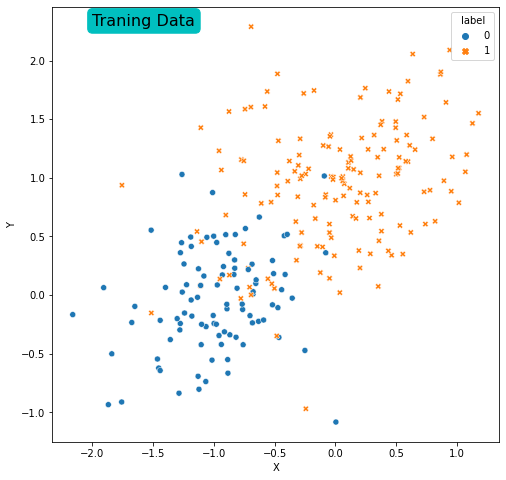

In [26]:
## plotting the training data
plt.figure(figsize=(8,8))
sns.scatterplot(data=train_ds, x='X', y='Y',
                style='label',
                hue='label')
plt.text(y=2.3, x=-2, s='Traning Data', size=16, bbox=dict(boxstyle='round',
                                                          color='c'))
plt.show()

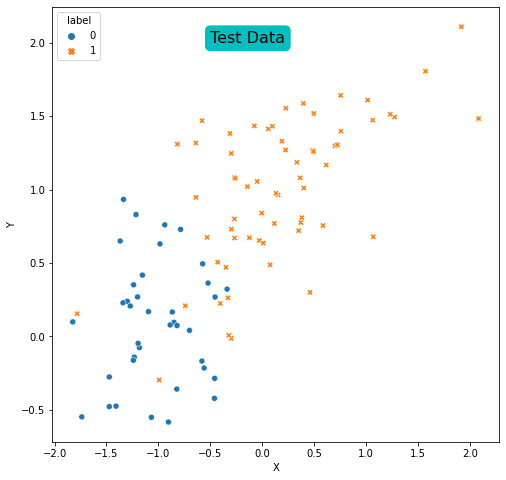

In [27]:
## plotting the test data
plt.figure(figsize=(8,8))
sns.scatterplot(data=test_ds, x='X', y='Y',
                style='label',
                hue='label')
plt.text(y=2, x=-0.5, s='Test Data', size=16, bbox=dict(boxstyle='round',
                                                          color='c'))
plt.show()

It is possible to see that the data is not linearly separable in training set.

## P2, P3, P4
**Question**: Find the gradient descent formulas in order to maximize the likelihood of the regression and using the initial weights as $1$ apply the learning rate $\frac{1}{t}$. ($t$ is the time steps $1, 2, ..., T$)

\begin{equation}
W^{new} \leftarrow W^{old} + \alpha(i)\sum_{i=1}^{n} \big( y_i - f(x_i, W^{old})\big) x_{i} \\
\text{Where }\alpha(i) = \frac{1}{i} \text{ For i=1, 2, ...}
\end{equation}

The `learning_rate=0` corresponds to $\frac{2}{t}$ and the `learning_rate=1` corresponds to $\frac{1}{\sqrt{t}}$.
Also the iterations can be adjusted using the argument `iterations`.

The errors are plotted in images that are saved within the HW2 folder.

In [28]:
!python3 scripts/main2_5.py learning_rate=0 iterations=500

Logistic Regression on housing dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
          X         Y
0  0.462766  0.339111
1  0.779089  0.894436
2  0.067501  0.846257
3 -0.048451  0.142165
4 -0.529524  0.792441
Test set head :
          X         Y
0 -0.521659  0.363769
1 -0.993098 -0.295949
2  2.083345  1.483410
3 -0.866462  0.166879
4 -1.182918 -0.075403
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.18533821040260134
 Test Error: 
  0.28
 Final Weights of the closed form training
[-0.10041674  0.74624728]
----------------------------------------------------------------------
----------------------------------------------------------------------
Gradient descent For

## P5
The learning rate is $\frac{1}{t}$ in the cell below

In [29]:
!python3 scripts/main2_5.py learning_rate=1 iterations=500

Logistic Regression on housing dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
          X         Y
0  0.462766  0.339111
1  0.779089  0.894436
2  0.067501  0.846257
3 -0.048451  0.142165
4 -0.529524  0.792441
Test set head :
          X         Y
0 -0.521659  0.363769
1 -0.993098 -0.295949
2  2.083345  1.483410
3 -0.866462  0.166879
4 -1.182918 -0.075403
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.18533821040260134
 Test Error: 
  0.28
 Final Weights of the closed form training
[-0.10041674  0.74624728]
----------------------------------------------------------------------
----------------------------------------------------------------------
Gradient descent For

And using static learning rate `0.5` in below

In [30]:
!python3 scripts/main2_5.py learning_rate=0.5 iterations=500

Logistic Regression on housing dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
          X         Y
0  0.462766  0.339111
1  0.779089  0.894436
2  0.067501  0.846257
3 -0.048451  0.142165
4 -0.529524  0.792441
Test set head :
          X         Y
0 -0.521659  0.363769
1 -0.993098 -0.295949
2  2.083345  1.483410
3 -0.866462  0.166879
4 -1.182918 -0.075403
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.18533821040260134
 Test Error: 
  0.28
 Final Weights of the closed form training
[-0.10041674  0.74624728]
----------------------------------------------------------------------
----------------------------------------------------------------------
Gradient descent For

In high iteration counts there is no obvious difference between different learning rates (But it just seems the $\frac{2}{t}$ learning rate is doing better). To find the difference we used 50 iterations in below

In [31]:
!python3 scripts/main2_5.py learning_rate=0 iterations=50

Logistic Regression on housing dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
          X         Y
0  0.462766  0.339111
1  0.779089  0.894436
2  0.067501  0.846257
3 -0.048451  0.142165
4 -0.529524  0.792441
Test set head :
          X         Y
0 -0.521659  0.363769
1 -0.993098 -0.295949
2  2.083345  1.483410
3 -0.866462  0.166879
4 -1.182918 -0.075403
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.18533821040260134
 Test Error: 
  0.28
 Final Weights of the closed form training
[-0.10041674  0.74624728]
----------------------------------------------------------------------
----------------------------------------------------------------------
Gradient descent For

In [32]:
!python3 scripts/main2_5.py learning_rate=1 iterations=50

Logistic Regression on housing dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
          X         Y
0  0.462766  0.339111
1  0.779089  0.894436
2  0.067501  0.846257
3 -0.048451  0.142165
4 -0.529524  0.792441
Test set head :
          X         Y
0 -0.521659  0.363769
1 -0.993098 -0.295949
2  2.083345  1.483410
3 -0.866462  0.166879
4 -1.182918 -0.075403
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.18533821040260134
 Test Error: 
  0.28
 Final Weights of the closed form training
[-0.10041674  0.74624728]
----------------------------------------------------------------------
----------------------------------------------------------------------
Gradient descent For

In [33]:
## And static learning rate
!python3 scripts/main2_5.py learning_rate=0.5 iterations=500

Logistic Regression on housing dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
          X         Y
0  0.462766  0.339111
1  0.779089  0.894436
2  0.067501  0.846257
3 -0.048451  0.142165
4 -0.529524  0.792441
Test set head :
          X         Y
0 -0.521659  0.363769
1 -0.993098 -0.295949
2  2.083345  1.483410
3 -0.866462  0.166879
4 -1.182918 -0.075403
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.18533821040260134
 Test Error: 
  0.28
 Final Weights of the closed form training
[-0.10041674  0.74624728]
----------------------------------------------------------------------
----------------------------------------------------------------------
Gradient descent For

We lower the iteration counts more to see better the differences 

In [34]:
!python3 scripts/main2_5.py learning_rate=0 iterations=5

Logistic Regression on housing dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
          X         Y
0  0.462766  0.339111
1  0.779089  0.894436
2  0.067501  0.846257
3 -0.048451  0.142165
4 -0.529524  0.792441
Test set head :
          X         Y
0 -0.521659  0.363769
1 -0.993098 -0.295949
2  2.083345  1.483410
3 -0.866462  0.166879
4 -1.182918 -0.075403
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.18533821040260134
 Test Error: 
  0.28
 Final Weights of the closed form training
[-0.10041674  0.74624728]
----------------------------------------------------------------------
----------------------------------------------------------------------
Gradient descent For

In [35]:
!python3 scripts/main2_5.py learning_rate=1 iterations=5

Logistic Regression on housing dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
          X         Y
0  0.462766  0.339111
1  0.779089  0.894436
2  0.067501  0.846257
3 -0.048451  0.142165
4 -0.529524  0.792441
Test set head :
          X         Y
0 -0.521659  0.363769
1 -0.993098 -0.295949
2  2.083345  1.483410
3 -0.866462  0.166879
4 -1.182918 -0.075403
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.18533821040260134
 Test Error: 
  0.28
 Final Weights of the closed form training
[-0.10041674  0.74624728]
----------------------------------------------------------------------
----------------------------------------------------------------------
Gradient descent For

In [36]:
!python3 scripts/main2_5.py learning_rate=0.5 iterations=5

Logistic Regression on housing dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
          X         Y
0  0.462766  0.339111
1  0.779089  0.894436
2  0.067501  0.846257
3 -0.048451  0.142165
4 -0.529524  0.792441
Test set head :
          X         Y
0 -0.521659  0.363769
1 -0.993098 -0.295949
2  2.083345  1.483410
3 -0.866462  0.166879
4 -1.182918 -0.075403
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.18533821040260134
 Test Error: 
  0.28
 Final Weights of the closed form training
[-0.10041674  0.74624728]
----------------------------------------------------------------------
----------------------------------------------------------------------
Gradient descent For

In the results we can see that there may be a little difference and the static learning rate `0.5` show the better results on Test Error in Incremental learning Gradient Descent.

## P6
Comparing the Incremental version of logisitic regression with the normal version shows that it can achive better results with high iteration counts.

# Q5
The data is used from the question 4 and Nive bayes method will be applied.

In [22]:
def probability_normal_distribution(X, mu, sigma):
    """
    The probability value for normal distribution function
    
    Parameters:
    ------------
    x : array_like
        the input data
    mu : float
        the mean value given
    sigma : float
        the variance given 
        
    Returns:
    --------
    probability : float
        the probability value for the x input values 
    """
    ## we've divided the equation in two parts
    p1 = 1 / (np.sqrt(np.pi * 2) * sigma)
    p2 = np.exp(-0.5 * ((X-mu) / sigma)**2 )
    
    probability = p1 * p2
    
    return probability
    
def find_MLE_Normal_distro(X):
    """
    the maximum likelihood estimation for parameters of normal distribution
    the parameters for normal distribution is covariance matrix and mean vector
    
    Parameters:
    ------------
    X : array_like
        the X input data vectors
    
    Returns:
    ---------
    mu : array_like
        the means vector
    variance : matrix_like
        the matrix representing the covariance

    """
    X = np.array(X)
    
    mu = (1 / len(X)) * np.sum(X)
    
    ## some changes was made to the ML estimation of variance
    ## because of dataset shape
    variance = np.sqrt((1 / len(X)) * np.sum((X - mu)**2))    
    
    return mu, variance

In [23]:
cols = ['X', 'Y', 'label']
train_ds = pd.read_csv('./hw2_data/classification_trn.txt',
                       delimiter=' +',
                      names=cols,
                      index_col=False,
                      engine='python')

test_ds = pd.read_csv('./hw2_data/classification_tst.txt',
                       delimiter=' +',
                      names=cols,
                      index_col=False,
                      engine='python')

In Naive Bayes the class conditional density can be computed by
\begin{equation}
p(x|c=1) = \prod_{i=1}^{d} p(x_i | c=1) \\
p(x|c=0) = \prod_{i=1}^{d} p(x_i | c=0) 
\end{equation}

In [24]:
## divide the dataset into 0 and 1 labels
def estimate_MLE_NB(X, Y, features_arr):
    """
    estimate the Maximum likelihood parameters for naive bayes method
    in detail: in naive bayes we have a parameter for each dimension and each class

    Parameters:
    ------------
    X : array_like
        the input data (a pandas dataframe is prefered)
    Y : array_like
        the labels for each `X` inputs
    features : array_like
        the string array for the name of each label in training data (dimensions)

    Returns:
    --------
    MLE_estimates : dictionary 
        the estimated parameters as a dictionary
    """
    ## dictionary of maximum likelihood estimations
    MLE_estimates = {}
    for feature in features_arr:
        for label in [0, 1]:
            mu, var = find_MLE_Normal_distro(X[Y == label][feature])
            ## each feature of class estimation
            MLE_estimates[f'{feature},{label}'] = [mu, var]
    return MLE_estimates

In [25]:
##################### Code is Implemented in the function above #####################

# ## dictionary of maximum likelihood estimations
# MLE_estimates = {}
# for feature in ['X', 'Y']:
#     for label in [0, 1]:
#         mu, var = find_MLE_Normal_distro(train_ds[train_ds.label == label][feature])
#         ## each feature of class estimation
#         MLE_estimates[f'{feature},{label}'] = [mu, var]


MLE_estimates = estimate_MLE_NB(train_ds[['X', 'Y']], train_ds[['label']].values, ['X', 'Y'])

In [26]:
MLE_estimates

{'X,0': [-0.9766294551726316, 0.4043628347745132],
 'X,1': [0.01564038684774194, 0.574343819845795],
 'Y,0': [-0.04355836269157895, 0.42688761701060846],
 'Y,1': [0.9415618305584516, 0.5324787748723679]}

In [27]:
def predict_NB(X, MLE_estimations, features_arr):
    """
    predict the class Using Naive bayes algorithm
    
    Parameters:
    ------------
    X : pandas dataframe
        Input data, `X` and `Y` should be the features
    MLE_estimations : dictionary
        Maximum likelihood estimations corresponding to each dimension and class as a dictionary with keys like `X,0`
        meaning X as first feature and 0 as first class 
        
    Returns:
    ---------
    prediction : array_like
        the array representing the probability of each class for data
    """
    ## the predicted value for each data
    prediction = []
    for idx in range(len(X)):
        ## initialize Class probability array
        class_p_arr = []
        for i in [0, 1]:
            ## multiply probability for each dimension
            p = 1
            for feature in features_arr:
                mu, var = MLE_estimations[f'{feature},{i}']
                p = p * probability_normal_distribution(X.iloc[idx][feature],mu, var)
            class_p_arr.append(p)
        ## save each class probability of each data
        prediction.append(class_p_arr)
    
    ## for ease of use convert to numpy
    prediction = np.array(prediction)
    return prediction

In [28]:
results  = predict_NB(train_ds[['X', 'Y']], MLE_estimates, ['X', 'Y'])
results.shape

(250, 2)

In [29]:
results[:4]

array([[1.09327234e-03, 2.02663171e-01],
       [6.64630522e-06, 2.14271447e-01],
       [3.74476058e-03, 5.10057518e-01],
       [6.01875199e-02, 1.67582766e-01]])

In [30]:
y_pred = (results[:, 0] < results[:, 1]).astype(int)

In [31]:
## Accuracy
(y_pred == train_ds[['label']].T.values).sum() / len(y_pred)

0.9

In [32]:
def probability_multivariate_normal_distribution(X,mu, sigma):
    """
    The probability value for multivariate normal distribution function
    
    Parameters:
    ------------
    x : array_like
        the input data
    mu : array_like
        the means vector
    sigma : matrix_like
        the matrix representing the covariance
        
    Returns:
    --------
    probability : float
        the probability value for the x input values 
    """
    dimension = len(mu)
    
    ## divide the formula into 2 parts
    p1 = 1 / np.sqrt(((2*np.pi)**dimension) * np.linalg.det(sigma))
    
    ## some changes was made to the equation
    ## because of dataset shape
    p2 = np.exp(-1/2 * (np.dot(X-mu, np.linalg.inv(sigma) @ (X-mu).T)))
    
    
    probability = p1 * p2
    
    return probability

def roc_curve(y, y_pred):
    """
    draw the roc curve
    
    Parameters:
    ------------
    y : array_like
        the actual output for the data
    y_pred : array_like
        the predicted output for data

    """

    scores = []
    ## find the values for each threshold
    ## TP -> True Positive
    ## TN -> True Negative
    ## FP -> False Positive
    ## FN -> False Negative
    for threshold in np.linspace(0, 1, 101):
        TP = ((y_pred >= threshold) & (y == 1)).sum()
        TN = ((y_pred <= threshold) & (y == 0)).sum()
        FP = ((y_pred > threshold) & (y == 0)).sum()
        FN = ((y_pred < threshold) & (y == 1)).sum()

        scores.append([threshold, TP, TN, FP, FN])

    df_cols = ['threshold', 'TP', 'TN', 'FP', 'FN']
    df_scores = pd.DataFrame(scores, columns=df_cols)

    ## sensitivity and specificity
    ## True Positive rate = sensitivity
    df_scores['sens'] = df_scores.TP / (df_scores.TP + df_scores.FN)
    ## False Positive rate = 1 - specificity
    df_scores['1-spec'] = df_scores.FP / (df_scores.FP + df_scores.TN)
    
    plt.plot(df_scores['sens'], df_scores['1-spec'])
    plt.xlabel('sens')
    plt.ylabel('1-spec')
    plt.title(f'ROC Curve')
    plt.show()


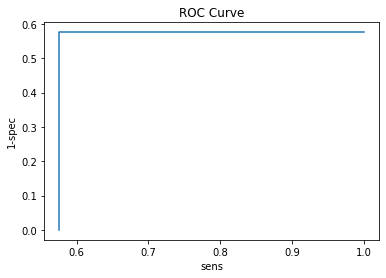

In [33]:
roc_curve(train_ds[['label']].values, y_pred)

Now we're going to apply the estimations on test set.

In [49]:
## test set
results = predict_NB(test_ds[['X', 'Y']], MLE_estimates, ['X', 'Y'])
y_pred = (results[:, 0] < results[:, 1]).astype(int)

In [50]:
## test accuracy
(y_pred == test_ds[['label']].T.values).sum() / len(y_pred)

0.91

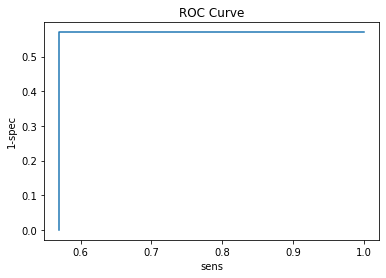

In [51]:
roc_curve(test_ds[['label']].values, y_pred)

# Q6
Use Quadratic Discriminant Analysis for `classification` data. The functions for question 5 can be used.

In [52]:
## we need to find the mean and covariance of each class

## divide into class 0 and class 1
train_ds_C0 = train_ds[train_ds.label == 0]
train_ds_C1 = train_ds[train_ds.label == 1]

train_ds_C0_X = train_ds_C0[['X', 'Y']]
train_ds_C0_Y = train_ds_C0[['label']]

train_ds_C1_X = train_ds_C1[['X', 'Y']]
train_ds_C1_Y = train_ds_C1[['label']]

mu0, sigma0 = find_MLE_Normal_distro(train_ds_C0_X.T)
mu1, sigma1 = find_MLE_Normal_distro(train_ds_C1_X.T)

In [53]:
## take a look at properties found
print("Class 0")
print(f'Covariance:\n{sigma0}\nMean vector:\n{mu0}\n')
print('--'*10)
print("Class 1")
print(f'Covariance:\n{sigma1}\nMean vector:\n{mu1}\n')

Class 0
Covariance:
467.38705057468275
Mean vector:
-48.45892134854999

--------------------
Class 1
Covariance:
917.6585102015431
Mean vector:
74.18317184898



Implementing The functions above and some other in a Class.

In [54]:
class QDA():
    """
    Quadratic Discriminant Analysis Class
    """
    def __init__(self):
        self.mu0 = None
        self.mu1 = None
        self.sigma0 = None
        self.sigma1 = None
    
    __
    def predict(self, X):
        """
        Predict the output for the X input
        
        Parameters:
        ------------
        X : array_like
            The data to be appended
        """
        mu0 = self.mu0
        mu1 = self.mu1
        sigma0 = self.sigma0
        sigma1 = self.sigma1
        
        ## check if the model is not learned and the parameters is updated
        ## checking one parameter is enough 
        ## because we are assigning a value to all in learning phase 
        if len(sigma0) == 0:
            raise "Error! First fit the model on a dataset then try to predict the values!"
        


        ## Find the probabilities for class 0
        ## save them in an array for furthur comparisons
        prediction = []
        for i in range(len(X)):
            ## Find the predicted Class of each data in class 0
            P_Class0 = self.__probability_multivariate_normal_distribution(X.iloc[i]
                                                             ,mu0, sigma0)

            P_Class1 = self.__probability_multivariate_normal_distribution(X.iloc[i]
                                                             ,mu1, sigma1)
            ## Compare and set the class to highest probability
            P = P_Class1 >= P_Class0

            ## Append the number of Class
            prediction.append(int(P))
        
        return prediction
    def fit(self, X):
        """
        Learning the parameters of the model (Binary Classification model!)
        
        Parameters:
        -----------
        X : array_like (pandas dataframe is preferred)
            the input values to be learned, With outputs as label
        # Y : array_like
        #     the label for the data (The binary classification task is here)
        """
        ## we need to find the mean and covariance of each class

        features_arr = X.columns[:-1]

        ## divide into class 0 and class 1
        train_ds_C0 = X[X.label == 0]
        train_ds_C1 = X[X.label == 1]

        # train_ds_C0_X = train_ds_C0[['X', 'Y']]
        train_ds_C0_X = train_ds_C0[features_arr]

        # train_ds_C0_Y = train_ds_C0[['label']]

        train_ds_C1_X = train_ds_C1[features_arr]
        # train_ds_C1_Y = train_ds_C1[['label']]

        mu0, sigma0 = self.__find_MLE_Normal_distro(train_ds_C0_X.T)
        mu1, sigma1 = self.__find_MLE_Normal_distro(train_ds_C1_X.T)
        
        ## Save the parameters of the model
        self.mu0 = mu0
        self.mu1 = mu1
        self.sigma0 = sigma0
        self.sigma1 = sigma1
            
    def __probability_multivariate_normal_distribution(self, X, mu, sigma):
        """
        The probability value for multivariate normal distribution function

        Parameters:
        ------------
        x : array_like
            the input data
        mu : array_like
            the means vector
        sigma : matrix_like
            the matrix representing the covariance

        Returns:
        --------
        probability : float
            the probability value for the x input values 
        """
        dimension = len(mu)

        ## divide the formula into 2 parts
        p1 = 1 / np.sqrt(((2*np.pi)**dimension) * np.linalg.det(sigma))

        ## some changes was made to the equation
        ## because of dataset shape
        p2 = np.exp(-1/2 * (np.dot(X-mu, np.linalg.inv(sigma) @ (X-mu).T)))


        probability = p1 * p2

        return probability

    def __find_MLE_Normal_distro(self, X):
        """
        the maximum likelihood estimation for parameters of multivatiate normal distribution
        the parameters for normal distribution is covariance matrix and mean vector

        Parameters:
        ------------
        X : array_like
            the X input data vectors

        Returns:
        ---------
        mu : array_like
            the means vector
        covariance : matrix_like
            the matrix representing the covariance

        """

        mu = (1 / len(X.T)) * np.sum(X, axis=1)

        ## some changes was made to the ML estimation of covariance
        ## because of dataset shape
        covariance = (1 / len(X.T)) * ((X.T-mu).T @ (X.T-mu))    

        return mu, covariance
   

In [55]:
## convert probabilities to numpy array
model_QDA = QDA()

train_ds_X = train_ds[['X', 'Y']]
train_ds_Y = train_ds[['label']]

model_QDA.fit(train_ds)

In [56]:
test_Y_pred = model_QDA.predict(test_ds[['X','Y']])
train_Y_pred = model_QDA.predict(train_ds_X)

In [57]:
print(f'Mu0:\n{model_QDA.mu0}\n')
print(f'Mu1:\n{model_QDA.mu1}')

Mu0:
X   -0.976629
Y   -0.043558
dtype: float64

Mu1:
X    0.015640
Y    0.941562
dtype: float64


In [58]:
print(f'Covariance_0:\n {model_QDA.sigma0}\n')
print(f'Covariance_1:\n {model_QDA.sigma1}\n')

Covariance_0:
           X         Y
X  0.163509  0.040219
Y  0.040219  0.182233

Covariance_1:
           X         Y
X  0.329871  0.092079
Y  0.092079  0.283534



In [59]:
## test accuracy
test_Y = test_ds[['label']].values.flatten()

acc_test = (test_Y == test_Y_pred).sum() / len(test_Y_pred)
acc_test

0.9

In [60]:
def find_ROC(y_pred, y_true, thresholds = 101):
    """
    Find the confusion matrix for each threshold (ROC)
    
    Parameters:
    ------------
    y_true : array_like
        the actual output of inputs
    y_pred : array_like
        the predicted values of inputs
    thresholds : positive integer
        the count of thresholds to be evaluated between 0 and 1
        default is 101

    Returns:
    ---------
    df_scores : pandas dataframe
        dataframe contains the confusion matrix for different thresholds
    """

    assert thresholds >= 5, "Error: Thresholds must be more than 5!" 
    
    scores = []

    ## find the values for each threshold
    ## TP -> True Positive
    ## TN -> True Negative
    ## FP -> False Positive
    ## FN -> False Negative
    for threshold in np.linspace(0, 1, thresholds):
        TP = ((y_pred >= threshold) & (y_true == 1)).sum()
        TN = ((y_pred <= threshold) & (y_true == 0)).sum()
        FP = ((y_pred > threshold) & (y_true == 0)).sum()
        FN = ((y_pred < threshold) & (y_true == 1)).sum()
        

        scores.append([threshold, TP, TN, FP, FN])

    df_cols = ['threshold', 'TP', 'TN', 'FP', 'FN']
    df_scores = pd.DataFrame(scores, columns=df_cols)

    ## sensitivity and specificity
    ## True Positive rate = sensitivity
    df_scores['sens'] = df_scores.TP / (df_scores.TP + df_scores.FN)
    ## False Positive rate = 1 - specificity
    df_scores['1-spec'] = df_scores.FP / (df_scores.FP + df_scores.TN)

    return df_scores
def export_ROC_Curve(df_scores, description):
    """
    save the roc curve using the dataframe scores
    
    Parameters:
    ------------
    df_scores : array_like
        the results computed for different thresholds
    description : string
        the name of the saved file
    """

    plt.plot(df_scores['sens'], df_scores['1-spec'])
    plt.title(f'ROC Curve for {description}')
    plt.savefig(f'Q6_QDA_{description}.png')
    plt.close()

In [61]:
roc_scores = find_ROC(test_Y_pred, test_Y)
export_ROC_Curve(roc_scores, 'MLE')

In [62]:
roc_scores.iloc[np.linspace(0, 100, 10, dtype=int)]

,threshold,TP,TN,FP,FN,sens,1-spec
0,0.00,62,35,3,0,1.000000,0.078947
11,0.11,55,35,3,7,0.887097,0.078947
22,0.22,55,35,3,7,0.887097,0.078947
33,0.33,55,35,3,7,0.887097,0.078947
44,0.44,55,35,3,7,0.887097,0.078947
55,0.55,55,35,3,7,0.887097,0.078947
66,0.66,55,35,3,7,0.887097,0.078947
77,0.77,55,35,3,7,0.887097,0.078947
88,0.88,55,35,3,7,0.887097,0.078947
100,1.00,55,38,0,7,0.887097,0.000000


# Q7

In [63]:
## column names are used from ```pima-indians-diabetes.name``` file
cols = ['pregnancy_count', 'glucose_test', 'blood_pressure', 'triceps_thickness', '2h_insulin', 'mass', 'pedi', 'age', 'label']

df_pima = pd.read_csv('../HW1/hw1_data/pima/pima-indians-diabetes.data', index_col=False ,names=cols)
df_pima.head()

,pregnancy_count,glucose_test,blood_pressure,triceps_thickness,2h_insulin,mass,pedi,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
##################### From HW1 #####################
def divideset2(df, fraction = 0.66):
    """
    Divide the dataset into train and test with fixed size every run

    INPUTS:
    ---------
    df: pandas dataframe, the dataset that is going to be splitted
    fraction: the value to divide the dataset, default is 0.66

    OUTPUTS:
    ---------
    train: pandas dataframe, the portion of the dataset for train
    test: pandas dataframe, the portion of the dataset for test
    """

    train = df.sample(frac=0.66).copy()
    test = df.drop(train.index)

    return train, test

In [65]:
df_pima_trn, df_pima_tst = divideset2(df_pima)

In [66]:
df_pima_trn.shape

(507, 9)

In [67]:
df_pima_tst.shape

(261, 9)

We have modified the script for question 4 and run it here.

In [68]:
!python3 scripts/main_2_7.py

Logistic Regression on housing dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
   pregnancy_count  glucose_test  blood_pressure  ...  mass   pedi  age
0                6           148              72  ...  33.6  0.627   50
1                1            85              66  ...  26.6  0.351   31
2                8           183              64  ...  23.3  0.672   32
3                1            89              66  ...  28.1  0.167   21
4                0           137              40  ...  43.1  2.288   33

[5 rows x 8 columns]
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.1791001059784589
 Test Error: 
  0.6471354166666666
 Final Weights of the closed form training
[

# Q8
Use Naive bayes implemented and used by question 5 for pima dataset.

In [69]:
pima_cols_X = df_pima_trn.columns[:-1]
MLE_estimates_Q8 = estimate_MLE_NB(df_pima_trn[pima_cols_X], df_pima_trn[['label']].values, pima_cols_X )
MLE_estimates_Q8

{'pregnancy_count,0': [3.3827893175074184, 3.075518425354172],
 'pregnancy_count,1': [4.947058823529412, 3.5616614839076943],
 'glucose_test,0': [109.9406528189911, 26.209089248154815],
 'glucose_test,1': [140.91764705882352, 33.11715807809526],
 'blood_pressure,0': [68.31750741839762, 18.76743713077681],
 'blood_pressure,1': [69.69411764705882, 21.696312253420487],
 'triceps_thickness,0': [19.762611275964392, 15.091512038708125],
 'triceps_thickness,1': [22.605882352941176, 17.416455051886835],
 '2h_insulin,0': [65.35311572700297, 91.42289286036038],
 '2h_insulin,1': [103.74705882352941, 139.6904166052542],
 'mass,0': [30.332640949554893, 7.0884075860170555],
 'mass,1': [34.94529411764706, 6.658175529684017],
 'pedi,0': [0.4379050445103858, 0.30617648254103347],
 'pedi,1': [0.5496176470588235, 0.3501867917274237],
 'age,0': [31.42433234421365, 11.96313829923815],
 'age,1': [36.67058823529412, 10.740126229178365]}

In [70]:
results_Q8 = predict_NB(df_pima_trn[pima_cols_X], MLE_estimates_Q8, pima_cols_X)

In [71]:
results_Q8.shape

(507, 2)

training set accuracy

In [72]:
y_pred = (results_Q8[:, 0] < results_Q8[:, 1]).astype(int)
## Accuracy
(y_pred == df_pima_trn[['label']].T.values).sum() / len(y_pred)

0.757396449704142

Training ROC

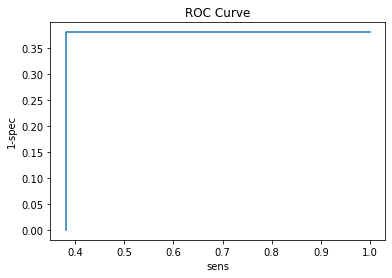

In [73]:
roc_curve(df_pima_trn[['label']].values, y_pred)

Test accuracy and ROC curve

In [74]:
results_Q8_tst = predict_NB(df_pima_tst[pima_cols_X], MLE_estimates_Q8, pima_cols_X)

In [75]:
y_pred = (results_Q8_tst[:, 0] < results_Q8_tst[:, 1]).astype(int)
## Accuracy
(y_pred == df_pima_tst[['label']].T.values).sum() / len(y_pred)

0.7624521072796935

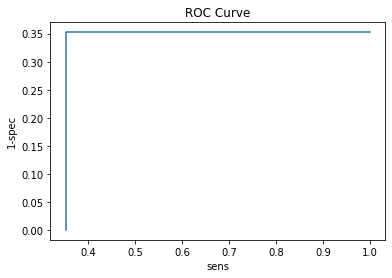

In [76]:
roc_curve(df_pima_tst[['label']].values, y_pred)

# Q9
Use QDA implemented in question 6 for pima dataset.

In [77]:
mode_QDA_pima = QDA()
## the dataframe with the output value will be sent
## the output column is named 'label'
mode_QDA_pima.fit(df_pima_trn)

In [78]:
results_Q9 = mode_QDA_pima.predict(df_pima_trn[pima_cols_X])

In [79]:
## accuracy
(results_Q9 == df_pima_trn[['label']].T.values).sum() / len(results_Q9)

0.7554240631163708

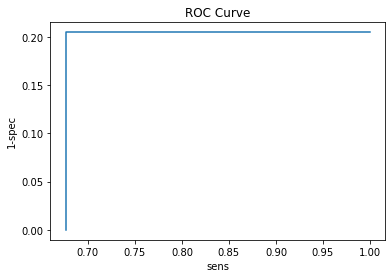

In [80]:
results_Q9 = np.array(results_Q9)

roc_curve(df_pima_trn[['label']].values.flatten(), results_Q9 )

Let's take a look at the test set.

In [81]:
results_Q9_tst = mode_QDA_pima.predict(df_pima_tst[pima_cols_X])
## accuracy
(results_Q9_tst == df_pima_tst[['label']].T.values).sum() / len(results_Q9_tst)

0.7586206896551724

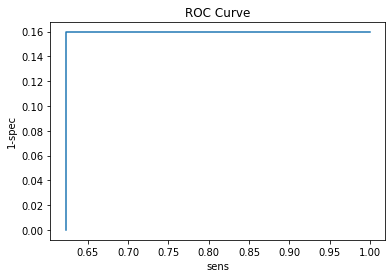

In [82]:
## ROC curve
results_Q9 = np.array(results_Q9)

roc_curve(df_pima_tst[['label']].values.flatten(), results_Q9_tst )

# Q10
Use SVM method to predict the outputs of pima dataset.

In [83]:
from sklearn.svm import SVC

In [84]:
model_svm = SVC()

model_svm.fit(df_pima_trn[pima_cols_X], df_pima_trn[['label']].values.flatten())

SVC()

In [85]:
results_Q10 = model_svm.predict(df_pima_trn[pima_cols_X])
## Training Accuracy
(results_Q10 == df_pima_trn[['label']].values.flatten()).sum() / len(results_Q10)

0.7633136094674556

In [86]:
results_Q10_tst = model_svm.predict(df_pima_tst[pima_cols_X])
## Test accuracy
(results_Q10_tst == df_pima_tst[['label']].values.flatten()).sum() / len(results_Q10_tst)

0.7509578544061303

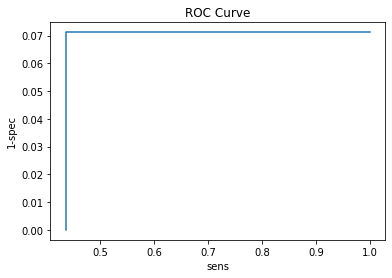

In [87]:
## Train ROC curve
roc_curve(df_pima_trn[['label']].values.flatten(), results_Q10)

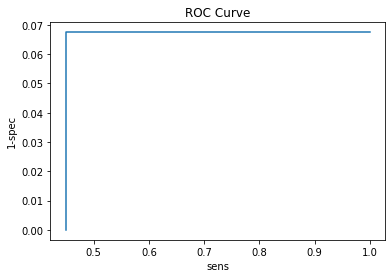

In [88]:
## Test ROC curve
roc_curve(df_pima_tst[['label']].values.flatten(), results_Q10_tst)